# Fraud Detection - Exploratory Data Analysis
Understanding patterns, imbalance, and transaction behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
import os
os.chdir("D:/Projects/Real-Time FinTech Fraud Intelligence Engine")

In [6]:
df = pd.read_csv("data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

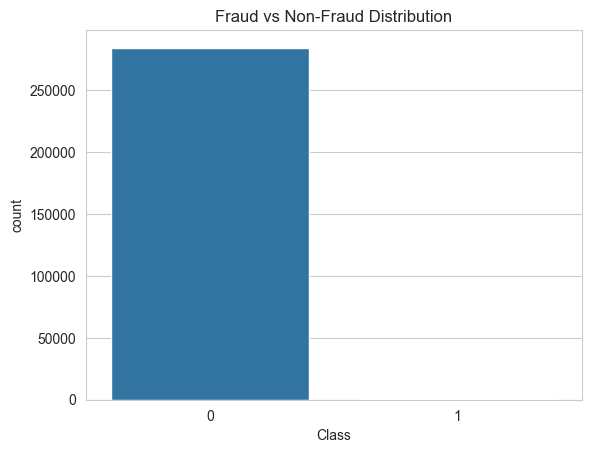

In [12]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

In [19]:
fraud_percentage = (df['Class'].sum() / len(df)) * 100
fraud_percentage


0.1727485630620034

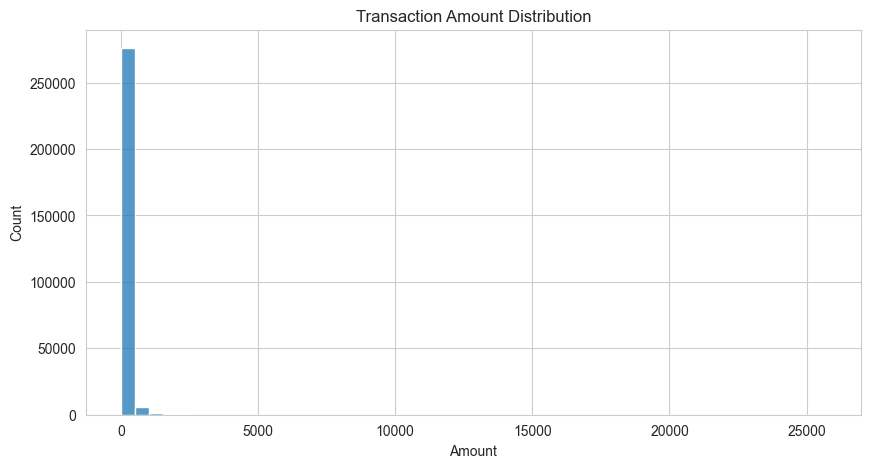

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

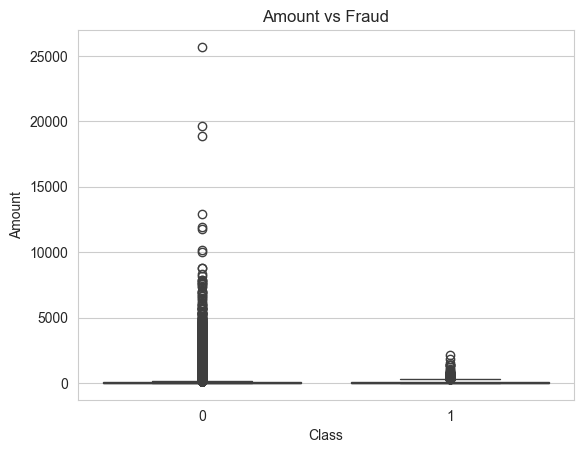

In [14]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount vs Fraud")
plt.show()

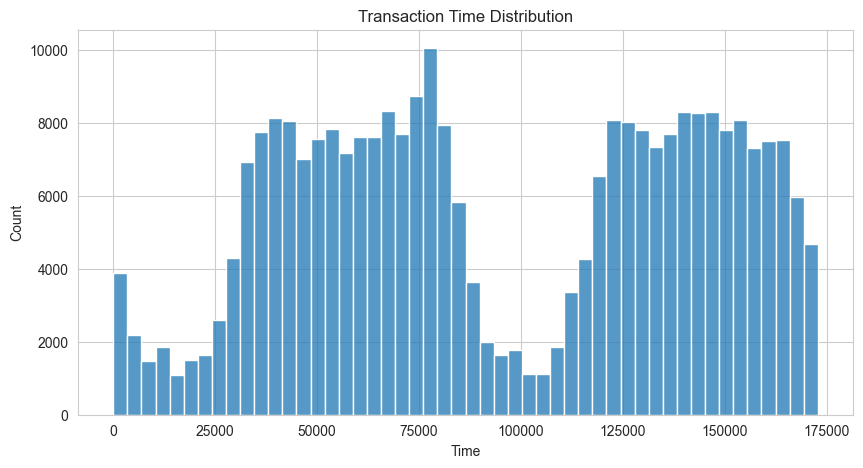

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()

In [20]:
df['Hour'] = df['Time'] // 3600

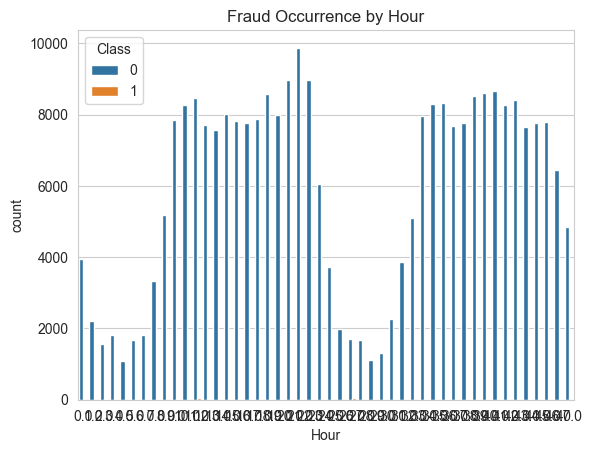

In [21]:
sns.countplot(x='Hour', hue='Class', data=df)
plt.title("Fraud Occurrence by Hour")
plt.show()


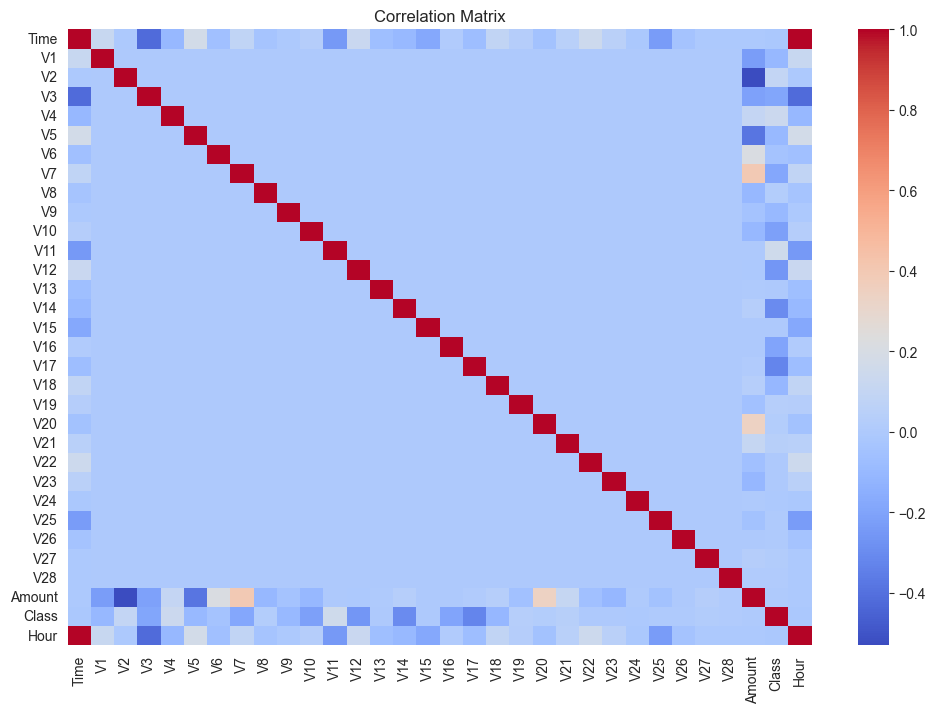

In [26]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
corr['Class'].sort_values(ascending=False).head(10)

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

In [23]:
corr['Class'].sort_values().head(10)


V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V18   -0.111485
V1    -0.101347
V9    -0.097733
Name: Class, dtype: float64

In [24]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < Q1 - 1.5*IQR) | (df['Amount'] > Q3 + 1.5*IQR)]
outliers.shape


(31904, 32)

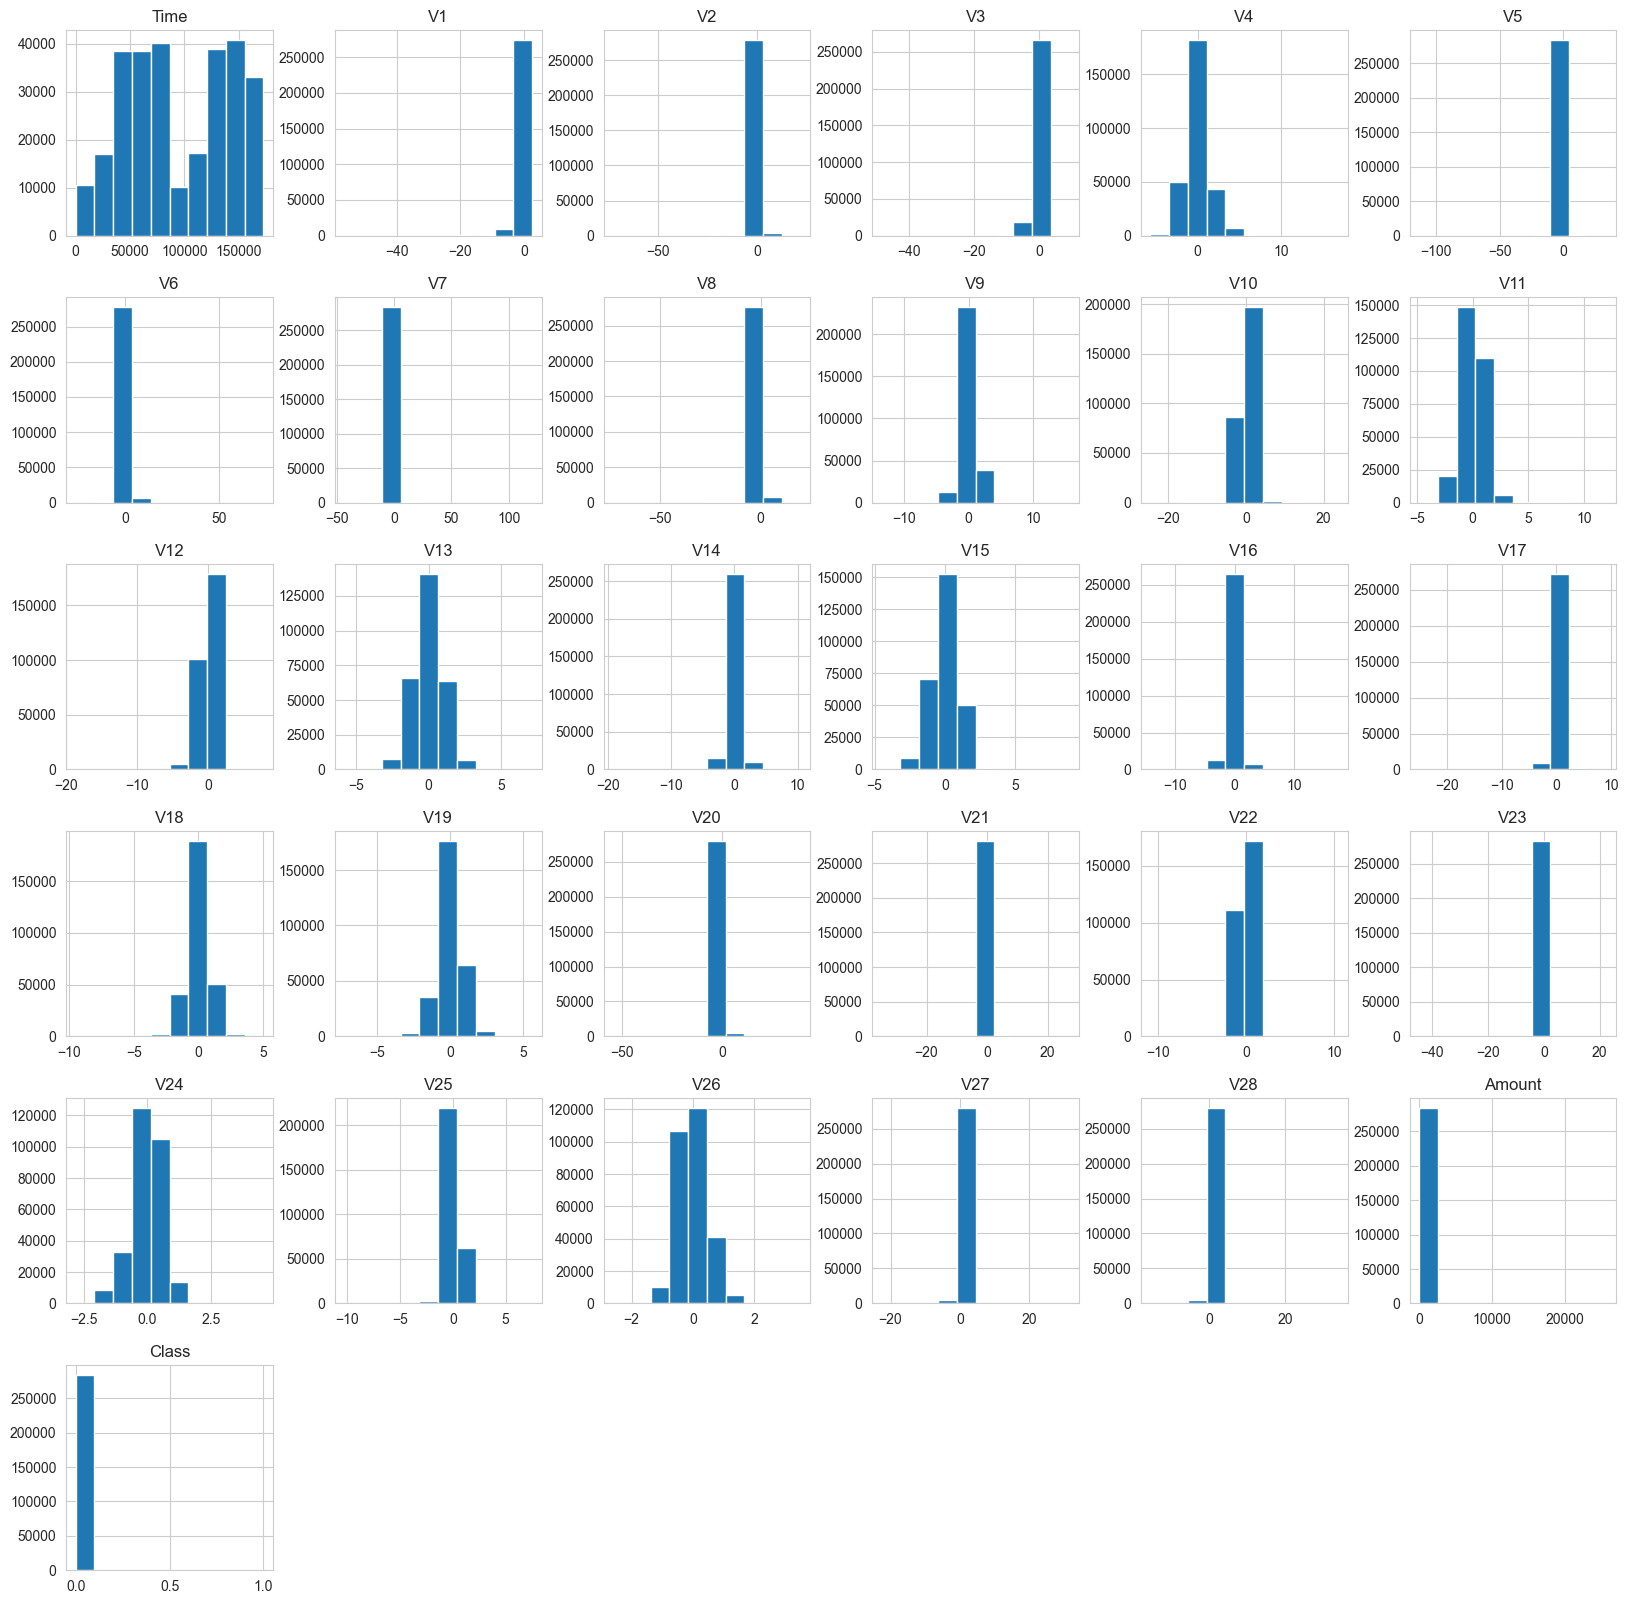

In [17]:
df.hist(figsize=(20,20))
plt.show()

In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,25.845703
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.000000


## Observations

- Dataset is extremely imbalanced (Fraud < 1%)
- No missing values
- Transaction amounts are skewed
- Some features show moderate correlation with fraud
- Time distribution suggests clustering

In [27]:
df.to_csv("data/processed/eda_clean.csv", index=False)

In [30]:
train_trans = pd.read_csv("data/raw/train_transaction.csv")
train_id = pd.read_csv("data/raw/train_identity.csv")

ieee_df = train_trans.merge(train_id, on='TransactionID', how='left')
ieee_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [31]:
ieee_df.shape

(590540, 434)

In [32]:
ieee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [34]:
missing = ieee_df.isnull().sum().sort_values(ascending=False)
missing.head(20)

id_24    585793
id_25    585408
id_07    585385
id_08    585385
id_21    585381
id_26    585377
id_27    585371
id_23    585371
id_22    585371
dist2    552913
D7       551623
id_18    545427
D13      528588
D14      528353
D12      525823
id_03    524216
id_04    524216
D6       517353
id_33    517251
id_10    515614
dtype: int64

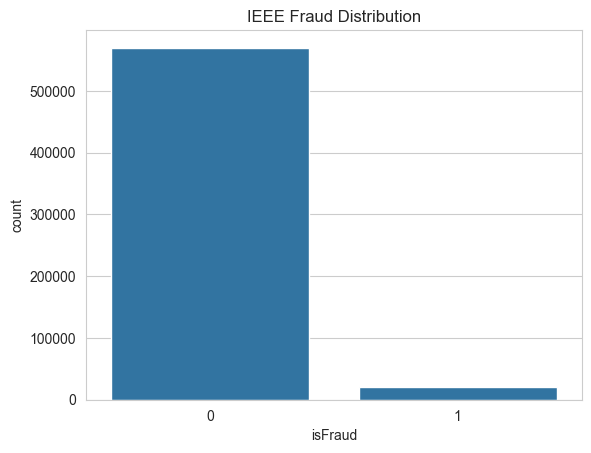

In [35]:
sns.countplot(x='isFraud', data=ieee_df)
plt.title("IEEE Fraud Distribution")
plt.show()

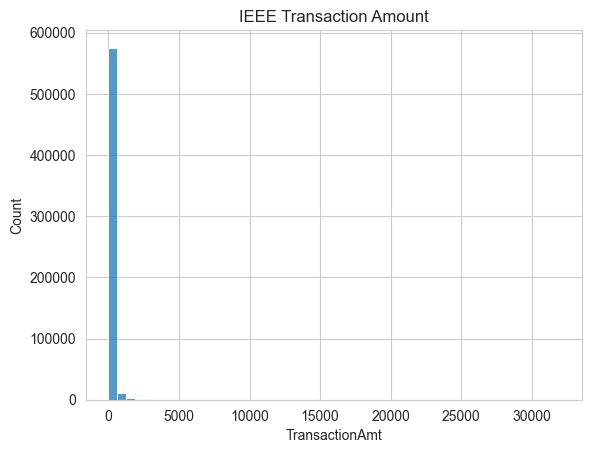

In [36]:
sns.histplot(ieee_df['TransactionAmt'], bins=50)
plt.title("IEEE Transaction Amount")
plt.show()

In [37]:
ieee_df.dtypes.value_counts()

float64    399
object      31
int64        4
Name: count, dtype: int64

In [41]:
ieee_numeric = ieee_df.select_dtypes(include=[np.number])
ieee_numeric.corr()['isFraud'].sort_values(ascending=False).head(10)

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
Name: isFraud, dtype: float64

## Observations

- Significant number of missing values across identity columns
- Fraud ratio remains extremely low, indicating severe class imbalance
- Dataset is much larger and noisier compared to the credit card dataset
- Contains many categorical/string features unsuitable for direct correlation
- Numeric features show limited but noticeable correlation with fraud

### Comparison of both the Datasets

| Aspect | Credit Card | IEEE-CIS |
|--------|------------|----------|
| Size | Small | Huge |
| Missing Values | None | Many |
| Complexity | Low | High |
| Feature Types | Numeric | Mixed |


# ===============================
# FINAL CONCLUSIONS & INSIGHTS
# ===============================

## Overall Findings

Through exploratory data analysis of both datasets, several critical patterns
and challenges related to fraud detection have been identified.

---

## Class Imbalance

Both datasets exhibit **extreme class imbalance**, with fraudulent transactions
representing less than 1% of the total data. This implies that:

- Accuracy alone is not a reliable evaluation metric.
- Recall, Precision, and PR-AUC will be more meaningful.
- Special handling techniques such as SMOTE, class weighting, or anomaly
  detection approaches will be necessary.

---

## Data Cleanliness & Complexity

### Credit Card Dataset
- Clean and fully numeric.
- No missing values.
- Suitable for baseline model development and quick experimentation.
- Easier to interpret and faster to train.

### IEEE-CIS Dataset
- Large, complex, and noisy.
- Contains numerous missing values.
- Mixed data types (numeric + categorical).
- More realistic representation of real-world fraud scenarios.
- Requires extensive preprocessing and feature engineering.

---

## Feature Behavior

- Transaction amounts show skewed distributions.
- Certain anonymized numerical features display moderate correlation with fraud.
- Time-based features suggest clustering patterns that may be useful for modeling.
- In the IEEE dataset, categorical and identity features will require encoding
  before model training.

---

## Modeling Implications

Based on the EDA, the following strategies are recommended:

- Use tree-based ensemble models (Random Forest, XGBoost, LightGBM)
  due to their robustness with imbalanced and tabular data.
- Implement imbalance handling techniques.
- Apply feature engineering, especially temporal and frequency-based features.
- Use explainability tools such as SHAP to interpret model decisions.

---

## Deployment & Simulation Considerations

- Real-time inference systems must handle highly skewed predictions.
- False positives must be minimized to avoid unnecessary transaction blocking.
- Synthetic data generation will later be used to simulate live transaction streams
  for deployment testing and dashboard demonstrations.

---

## Final Takeaway

The credit card dataset serves as a **foundation for model learning and prototyping**, 
while the IEEE-CIS dataset acts as a **realistic large-scale environment** for 
advanced modeling and system design.

Together, these datasets provide both conceptual understanding and practical 
exposure to real-world fraud detection challenges.
